In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import functions as f
from pyspark.sql.functions import isnan, when, count, col
import os 
import seaborn as sns
import matplotlib.pyplot as plt

os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /usr/share/java/mariadb-java-client-2.5.3.jar pyspark-shell'

#Inicializar PySpark
spark_context = SparkContext()
sql_context = SQLContext(spark_context)
spark = sql_context.sparkSession

df = spark.read.options(header='True', inferSchema='True', delimiter=';', encoding = 'ISO-8859-1').format('csv').load('./data/anexo-proyecciones-poblacion-Municipal_Area_2018-2035.csv')

In [2]:
df.show()

+---+---------+----+--------+----+--------------------+-------+
| DP|    DPNOM|DPMP|    MPIO| AÑO|     ÁREA GEOGRÁFICA|  Total|
+---+---------+----+--------+----+--------------------+-------+
|  5|Antioquia|5001|Medellín|2018|  Cabecera Municipal|2382399|
|  5|Antioquia|5001|Medellín|2018|Centros Poblados ...|  44730|
|  5|Antioquia|5001|Medellín|2018|               Total|2427129|
|  5|Antioquia|5001|Medellín|2019|  Cabecera Municipal|2439470|
|  5|Antioquia|5001|Medellín|2019|Centros Poblados ...|  44075|
|  5|Antioquia|5001|Medellín|2019|               Total|2483545|
|  5|Antioquia|5001|Medellín|2020|  Cabecera Municipal|2490164|
|  5|Antioquia|5001|Medellín|2020|Centros Poblados ...|  43260|
|  5|Antioquia|5001|Medellín|2020|               Total|2533424|
|  5|Antioquia|5001|Medellín|2021|  Cabecera Municipal|2530461|
|  5|Antioquia|5001|Medellín|2021|Centros Poblados ...|  42759|
|  5|Antioquia|5001|Medellín|2021|               Total|2573220|
|  5|Antioquia|5001|Medellín|2022|  Cabe

# Descripción de Columnas y Registros.

In [3]:
df.count()

60588

In [4]:
len(df.columns)

7

In [5]:
df.columns

['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', 'Total']

In [6]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+-----+----+----+---+---------------+-----+
| DP|DPNOM|DPMP|MPIO|AÑO|ÁREA GEOGRÁFICA|Total|
+---+-----+----+----+---+---------------+-----+
|  0|    0|   0|   0|  0|              0|    0|
+---+-----+----+----+---+---------------+-----+



En total se tiene **60.588** registros y **7** columnas. Sin datos faltantes.

## DP 

La columna **DP**, es un dato categórico  que hace referencia al código único por cada departamento de Colombia.

En total son **33** codigos únicos, sin datos faltantes.

In [7]:
df.groupBy('DP').count().orderBy('DP').count()

33

Número de registros por categória de **DP**.

In [8]:
df.groupBy('DP').count().orderBy('DP').show()

+---+-----+
| DP|count|
+---+-----+
|  5| 6750|
|  8| 1242|
| 11|   54|
| 13| 2484|
| 15| 6642|
| 17| 1458|
| 18|  864|
| 19| 2268|
| 20| 1350|
| 23| 1620|
| 25| 6264|
| 27| 1620|
| 41| 1998|
| 44|  810|
| 47| 1620|
| 50| 1566|
| 52| 3456|
| 54| 2160|
| 63|  648|
| 66|  756|
+---+-----+
only showing top 20 rows



## DPNOM

La columna **DPNOM**, es un dato categórico que hace referencia al nombre de cada departamento de Colombia.

En total son **35** nombres, sin datos faltantes.

In [9]:
df.groupBy('DPNOM').count().orderBy('DPNOM').count()

35

Número de registros por categória de **DPNOM**.

In [10]:
df.groupBy('DPNOM').count().orderBy('DPNOM').show()

+--------------------+-----+
|               DPNOM|count|
+--------------------+-----+
|            Amazonas|  594|
|           Antioquia| 6750|
|              Arauca|  378|
|Archipiélago de S...|   36|
|Archipiélago de S...|   72|
|           Atlántico| 1242|
|        Bogotá, D.C.|   54|
|             Bolívar| 2484|
|              Boyacá| 6642|
|              Caldas| 1458|
|             Caquetá|  864|
|            Casanare| 1026|
|               Cauca| 2268|
|               Cesar| 1350|
|               Chocó| 1620|
|        Cundinamarca| 6264|
|             Córdoba| 1620|
|             Guainía|  486|
|            Guaviare|  216|
|               Huila| 1998|
+--------------------+-----+
only showing top 20 rows



# DPMP

La columna **DPMP**, es un dato categórico que hace referencia al código único de cada municipio de Colombia.

En total son **1122** codigos únicos, sin datos faltantes.

In [11]:
df.groupBy('DPMP').count().orderBy('DPMP').count()

1122

Número de registros por categória de **DPMP**.

In [12]:
df.groupBy('DPMP').count().orderBy('DPMP').show()

+----+-----+
|DPMP|count|
+----+-----+
|5001|   54|
|5002|   54|
|5004|   54|
|5021|   54|
|5030|   54|
|5031|   54|
|5034|   54|
|5036|   54|
|5038|   54|
|5040|   54|
|5042|   54|
|5044|   54|
|5045|   54|
|5051|   54|
|5055|   54|
|5059|   54|
|5079|   54|
|5086|   54|
|5088|   54|
|5091|   54|
+----+-----+
only showing top 20 rows



## MPIO

La columna **MPIO**, es un dato categórico que hace referencia al código único de cada municipio de Colombia.

En total son **1049** nombres únicos, sin datos faltantes.

In [13]:
df.groupBy('MPIO').count().orderBy('MPIO').count()

1049

Número de registros por categória de **MPIO**.

In [14]:
df.groupBy('MPIO').count().orderBy('MPIO').show()

+---------------+-----+
|           MPIO|count|
+---------------+-----+
|      Abejorral|   54|
|       Abriaquí|   54|
|        Acacías|   54|
|         Acandí|   54|
|        Acevedo|   54|
|           Achí|   54|
|         Agrado|   54|
|   Agua de Dios|   54|
|      Aguachica|   54|
|         Aguada|   54|
|        Aguadas|   54|
|        Aguazul|   54|
|Agustín Codazzi|   54|
|           Aipe|   54|
|        Albania|  162|
|          Albán|  108|
|         Alcalá|   54|
|         Aldana|   54|
|     Alejandría|   54|
|      Algarrobo|   54|
+---------------+-----+
only showing top 20 rows



## AÑO

La columna **AÑO**, es un dato categórico que hace referencia al año para cual se hace la estimación de la publación de los municipios, para el **2018** es el año del censo del pais.

En total son **18** años diferentes, desde el **2018** al **2035**, sin datos faltantes.

In [15]:
df.groupBy('AÑO').count().orderBy('AÑO').count()

18

Número de registros por categória de **AÑO**.

In [16]:
df.groupBy('AÑO').count().orderBy('AÑO').show()

+----+-----+
| AÑO|count|
+----+-----+
|2018| 3366|
|2019| 3366|
|2020| 3366|
|2021| 3366|
|2022| 3366|
|2023| 3366|
|2024| 3366|
|2025| 3366|
|2026| 3366|
|2027| 3366|
|2028| 3366|
|2029| 3366|
|2030| 3366|
|2031| 3366|
|2032| 3366|
|2033| 3366|
|2034| 3366|
|2035| 3366|
+----+-----+



## ÁREA GEOGRÁFICA

La columna **ÁREA GEOGRÁFICA**, es un dato categórico que hace referencia a tres tipos de población que se puede encontrar por municipio, **Cabecera Municipal** que son las poblaciones principales de cada municipio, **Centros Poblados y Rural Disperso**, que son las partes alejadas de los municipios y **Total** es la población compuesta por las dos categórias anteriores.

En total son **3** codigos únicos, sin datos faltantes.

In [17]:
df.groupBy('ÁREA GEOGRÁFICA').count().orderBy('ÁREA GEOGRÁFICA').count()

3

Número de registros por categória de **ÁREA GEOGRÁFICA**.

In [18]:
df.groupBy('ÁREA GEOGRÁFICA').count().orderBy('ÁREA GEOGRÁFICA').show()

+--------------------+-----+
|     ÁREA GEOGRÁFICA|count|
+--------------------+-----+
|  Cabecera Municipal|20196|
|Centros Poblados ...|20196|
|               Total|20196|
+--------------------+-----+



## Total

La columna **Total**, es un dato numérico que dice el total de población por municipio, si nvalores faltantes.

Con las siguientes estadísticas: 

    - valor mínimo: 0
    - valor máximo: 8,726,402
    - media: 31,928.8685
    - mediana: 8,282
    - desviación estándar: 229,113.9358

In [19]:
df.toPandas().Total.min()

0

In [20]:
df.toPandas().Total.max()

8726402

In [21]:
df.toPandas().Total.mean()

31928.86855482934

In [22]:
df.toPandas().Total.median()

8282.0

In [23]:
df.toPandas().Total.std()

229113.93587380007

# Datos de Interés

Como primera aproximación a la integración de esta fuente de datos externa, se quiere utilizar los datos del **Año 2018**, ya que para este periodo de tiempo es para cual se tiene la última actualización de los datos de aeropuertos de la **Etapa 3**. 

Por otro lado, para este análisis inicial solo es necesario tener la información del total de la población por municipio, por lo que se van a usar los datos **Total** de la columna **ÁREA GEOGRÁFICA**. A continuación, se muestran los datos de interés para el análisis: 


In [24]:
df_int = df.filter((df.AÑO == 2018) & (df['ÁREA GEOGRÁFICA'] == 'Total'))
df_int.show()

+---+---------+----+--------------------+----+---------------+-------+
| DP|    DPNOM|DPMP|                MPIO| AÑO|ÁREA GEOGRÁFICA|  Total|
+---+---------+----+--------------------+----+---------------+-------+
|  5|Antioquia|5001|            Medellín|2018|          Total|2427129|
|  5|Antioquia|5002|           Abejorral|2018|          Total|  20367|
|  5|Antioquia|5004|            Abriaquí|2018|          Total|   2695|
|  5|Antioquia|5021|          Alejandría|2018|          Total|   4657|
|  5|Antioquia|5030|               Amagá|2018|          Total|  30227|
|  5|Antioquia|5031|              Amalfi|2018|          Total|  25962|
|  5|Antioquia|5034|               Andes|2018|          Total|  43269|
|  5|Antioquia|5036|         Angelópolis|2018|          Total|   5756|
|  5|Antioquia|5038|           Angostura|2018|          Total|  11437|
|  5|Antioquia|5040|               Anorí|2018|          Total|  18321|
|  5|Antioquia|5042|Santafé de Antioquia|2018|          Total|  26164|
|  5|A

# Perfilamiento de los Datos de Interés

Por lo anterior para la columna **AÑO** ahora solo se tiene el valor **2018** y para la columna **ÁREA GEOGRÁFICA**, solo se tiene el valor **Total**. Las otras columnas se vieron afectadas así:

# DPMP

La columna **DPMP**, es un dato categórico que hace referencia al código único de cada municipio de Colombia.

En total son **1122** codigos únicos, sin datos faltantes.

In [25]:
df_int.groupBy('DPMP').count().orderBy('DPMP').count()

1122

Número de registros por categória de **DPMP**.

In [26]:
df_int.groupBy('DPMP').count().orderBy('DPMP').show()

+----+-----+
|DPMP|count|
+----+-----+
|5001|    1|
|5002|    1|
|5004|    1|
|5021|    1|
|5030|    1|
|5031|    1|
|5034|    1|
|5036|    1|
|5038|    1|
|5040|    1|
|5042|    1|
|5044|    1|
|5045|    1|
|5051|    1|
|5055|    1|
|5059|    1|
|5079|    1|
|5086|    1|
|5088|    1|
|5091|    1|
+----+-----+
only showing top 20 rows



## MPIO

La columna **MPIO**, es un dato categórico que hace referencia al código único de cada municipio de Colombia.

En total son **1039** nombres únicos, sin datos faltantes.

In [27]:
df_int.groupBy('MPIO').count().orderBy('MPIO').count()

1039

Número de registros por categória de **MPIO**.

In [28]:
df_int.groupBy('MPIO').count().orderBy('MPIO').show()

+---------------+-----+
|           MPIO|count|
+---------------+-----+
|      Abejorral|    1|
|       Abriaquí|    1|
|        Acacías|    1|
|         Acandí|    1|
|        Acevedo|    1|
|           Achí|    1|
|         Agrado|    1|
|   Agua de Dios|    1|
|      Aguachica|    1|
|         Aguada|    1|
|        Aguadas|    1|
|        Aguazul|    1|
|Agustín Codazzi|    1|
|           Aipe|    1|
|        Albania|    3|
|          Albán|    2|
|         Alcalá|    1|
|         Aldana|    1|
|     Alejandría|    1|
|      Algarrobo|    1|
+---------------+-----+
only showing top 20 rows



## Total

La columna **Total**, es un dato numérico que dice el total de población por municipio, si nvalores faltantes.

Con las siguientes estadísticas: 

    - valor mínimo: 279
    - valor máximo: 7,412,566
    - media: 43,011.1354
    - mediana: 12,765.5
    - desviación estándar: 253,826.2070

In [29]:
df_int.toPandas().Total.min()

279

In [30]:
df_int.toPandas().Total.max()

7412566

In [31]:
df_int.toPandas().Total.mean()

43011.13547237077

In [32]:
df_int.toPandas().Total.median()

12765.5

In [33]:
df_int.toPandas().Total.std()

253826.2070286036

# Visualización de los datos de interés.

A continuación se observa cómo se distribuyen los datos de principal interés para el análisis.

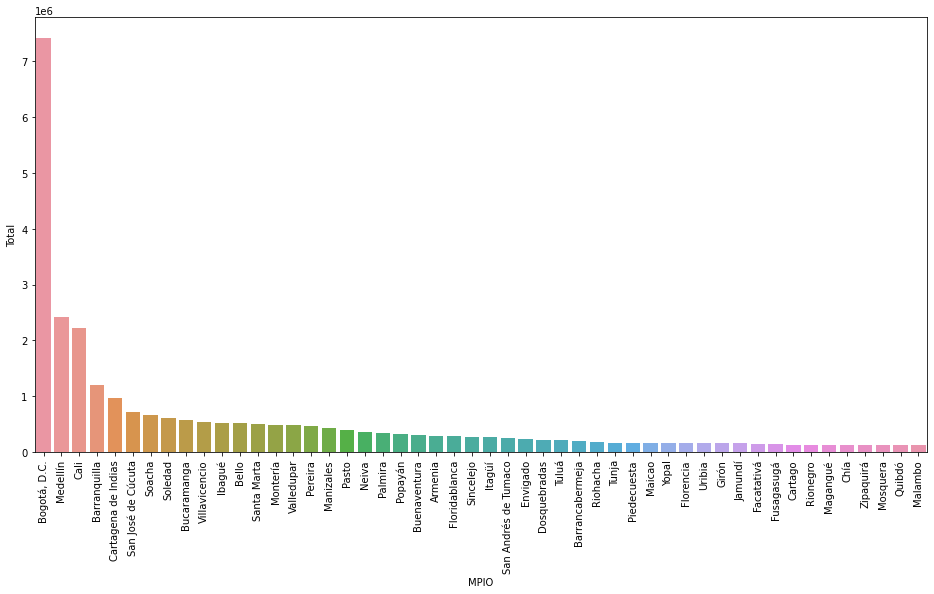

In [34]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="MPIO", y="Total", data=df_int.toPandas().sort_values(by=['Total'], ascending=False)[:50], ax=ax)

ax.tick_params(axis='x', rotation=90)

In [35]:
df_int.toPandas().to_csv('./data/Población_municipio_2018.csv')